#### Tarea: Ecuaciones diferenciales

Resover la siguiente función utilizando el método de Euler, Runge-Kutta de 2do y 3er orden

$$\frac{dy}{dx} = x^2-3y$$
$$y(0)=1 $$
$$0\le x \le 4$$

Paquetes utilizados

In [127]:
using PyPlot
using LinearAlgebra

Función problema

In [128]:
f(x, y) = x^2-3*y

f (generic function with 1 method)

Utilizando las relaciones dadas y evaluando con 100 puntos

In [129]:
x1, x2, y0, n = 0, 4, 1, 100

(0, 4, 1, 100)

Regla de Cramer para realizar los ajustes de función

In [130]:
function Cramer(A, b)
    DetA = det(A)
    n = length(b)
    xi = []
    for i=1:n
        Apivot = copy(A)
        Apivot[:,i] = b
        DetApivot = det(Apivot)
        x = DetApivot/DetA
        append!(xi, x)
    end
    return xi
end

Cramer (generic function with 1 method)

Ajuste

In [131]:
function RegresionPol_2(x, y)
    # x = float(x)
    # y = float(y)
    n = length(x)
    # Matriz de coeficiente
    suma_x = 0
    suma_x2 = 0
    suma_x3 = 0
    suma_x4 = 0
    # Matriz de resultados
    suma_y = 0
    suma_xy = 0
    suma_x2y = 0
    for i=1:n
        suma_x = suma_x + x[i]
        suma_x2 = suma_x2 + x[i]^2
        suma_y = suma_y + y[i]
        suma_x3 = suma_x3 + x[i]^3
        suma_xy = suma_xy + x[i]*y[i]
        suma_x4 = suma_x4 + x[i]^4
        suma_x2y = suma_x2y + y[i]*x[i]^2
    end
    # Resolución de matriz con regla de Cramer
    A = [n suma_x suma_x2; suma_x suma_x2 suma_x3; suma_x2 suma_x3 suma_x4]
    b = [suma_y; suma_xy; suma_x2y]
    ai = Cramer(A, b)
    # Aproximacion a los resultados
    yn = []
    for i = 1:n
        append!(yn, ai[1] + ai[2]*x[i] + ai[3]*x[i]^2)
    end
    # Cálculo del coeficiente de correlacion
    media_y = suma_y/n
    suma_1 = 0
    suma_2 = 0
    for i=1:n
        suma_1 = suma_1 + (y[i] - media_y)^2
        suma_2 = suma_2 + (y[i] - ai[1] - ai[2]*x[i] - ai[3]*x[i]^2)^2
    end 
    r = (suma_1 - suma_2)/suma_1
    return ai, r, yn
end

RegresionPol_2 (generic function with 1 method)

##### Método de Euler o Runge-Kutta de 1er orden 

In [132]:
function Euler(fxy, x1, x2, y0, n)
    h = (x2 - x1)/n # Tamaño de paso
    x = [] # Solucion de x
    y = [] # Solucion de y
    append!(y, y0) # El primer valor de y(0) = b
    # Generación de los puntos en el vector xi
    for i = 0:n
        append!(x, x1+h*i)
    end
    # Aplicación del método
    for j = 1:n
        append!(y, y[j] + fxy(x[j], y[j])*h)
    end
    return x, y
end

Euler (generic function with 1 method)

Respuesta y geneneración de gráfico

 y = (0.565167754068136) + (-0.6611495006462316) x + (0.4189824890534762) x^2 
Con un ajuste r = 0.9948


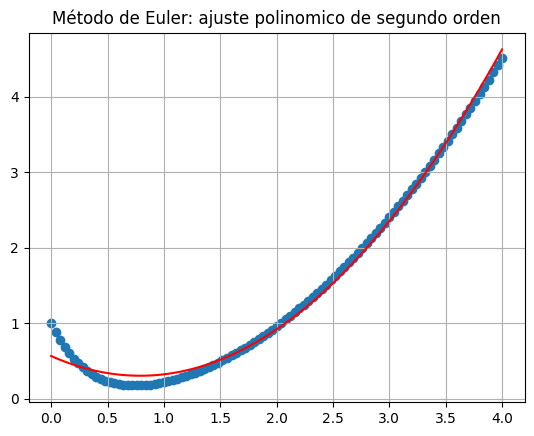

In [133]:
x, y = Euler(f, x1, x2, y0, n)
scatter(x, y) 
ai, r, yn = RegresionPol_2(x, y)
plot(transpose(x), yn, "r") # Gráfica el ajuste
grid("True")
title("Método de Euler: ajuste polinomico de segundo orden")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2 \nCon un ajuste r = ", round(r, digits=4))

##### Método de Runge-Kutta de 2do orden

In [134]:
function RungeKutta2(fxy, x1, x2, y0, n)
    h = (x2 - x1)/n # Tamaño de paso
    # Arreglos donde se guardaran la solucion 
    x = []
    y = []
    # Solucion y(0) = y0
    append!(y, y0)
    # Generacion de los puntos xi
    for i = 0:n
        append!(x, x1+h*i)
    end
    # Aplicación del método
    for j = 1:n
        k1 = fxy(x[j], y[j])
        k2 = fxy(x[j] + h, y[j] + k1*h)
        append!(y, y[j] + h/2*(k1 + k2)) # Método de Heun
    end 
    return x, y
end 


RungeKutta2 (generic function with 1 method)

Respuesta y generación de gráfico

 y = (0.5878373209646008) + (-0.6726921030391175) x + (0.4207788086470292) x^2 
Con un ajuste r = 0.9951


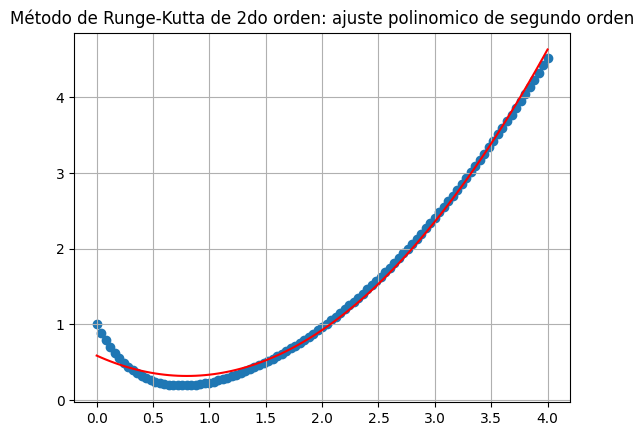

In [135]:
x, y = RungeKutta2(f, x1, x2, y0, n)
scatter(x, y) 
ai, r, yn = RegresionPol_2(x, y)
plot(transpose(x), yn, "r") # Gráfica el ajuste
grid("True")
title("Método de Runge-Kutta de 2do orden: ajuste polinomico de segundo orden")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2 \nCon un ajuste r = ", round(r, digits=4))

##### Método de Runge-Kutta de 3er orden

In [136]:
function RungeKutta3(fxy, x1, x2, y0, n)
    h = (x2 - x1)/n # Tamaño de paso
    # Arreglos donde se guardaran la solucion 
    x = []
    y = []
    # Solucion y(0) = y0
    append!(y, y0)
    # Generacion de los puntos xi
    for i = 0:n
        append!(x, x1+h*i)
    end
    # Aplicación del método
    for j = 1:n
        k1 = fxy(x[j], y[j])
        k2 = fxy(x[j] + h/2, y[j] + k1*h/2)
        k3 = fxy(x[j] + h, y[j] - k1*h + 2*k2*h)
        append!(y, y[j] + (1/6)*(k1 + 4*k2 + k3)*h)
    end 
    return x, y
end

RungeKutta3 (generic function with 1 method)

Resultados y generación de gráfico

 y = (0.5868613549442294) + (-0.672274503021513) x + (0.4207172141969165) x^2 
Con un ajuste r = 0.9951


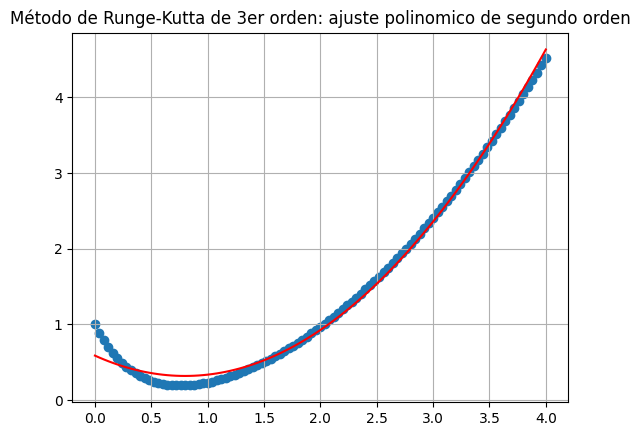

In [137]:
x, y = RungeKutta3(f, x1, x2, y0, n)
scatter(x, y) 
ai, r, yn = RegresionPol_2(x, y)
plot(transpose(x), yn, "r") # Gráfica el ajuste
grid("True")
title("Método de Runge-Kutta de 3er orden: ajuste polinomico de segundo orden")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2 \nCon un ajuste r = ", round(r, digits=4))

##### Método de Runge-Kutta de 4to orden

In [138]:
function RungeKutta4(fxy, x1, x2, y0, n)
    h = (x2-x1)/n # Tamaño de paso
    xi = [] # Solucion de x
    yi = [] # Solucion de y
    append!(yi, y0) # El primer valor de y(0) = b
    # Generación de puntos xi
    for i = 0:n # Generación de puntos xi
        append!(xi, x1+h*i)
    end
    # Aplicación del método
    for i=1:n 
        k1 = h*fxy(xi[i], yi[i])
        k2 = h*fxy(xi[i] + h/2, yi[i] + k1/2)
        k3 = h*fxy(xi[i] + h/2, yi[i] + k2/2)
        k4 = h*fxy(xi[i] + h, yi[i] + k3)
        append!(yi, yi[i] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
    end
    return xi, yi # Ajustar a una función después
end

RungeKutta4 (generic function with 1 method)

Respuesta y generación de gráfico

 y = (0.5868893340503913) + (-0.6722884140073307) x + (0.42071933268962053) x^2 
Con un ajuste r = 0.9951


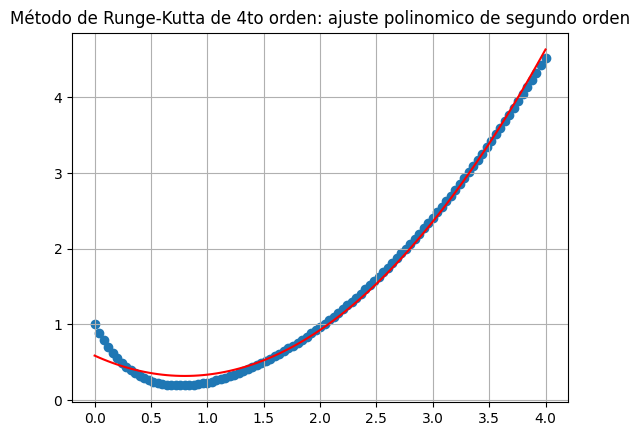

In [139]:
x, y = RungeKutta4(f, x1, x2, y0, n)
scatter(x, y) 
ai, r, yn = RegresionPol_2(x, y)
plot(transpose(x), yn, "r") # Gráfica el ajuste
grid("True")
title("Método de Runge-Kutta de 4to orden: ajuste polinomico de segundo orden")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2 \nCon un ajuste r = ", round(r, digits=4))